In [1]:
%pylab inline
import numpy as np
from scipy import stats
import pymc3 as pm
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Simulate standard normal data.

In [2]:
data = np.random.randn(100)

In [3]:
with pm.Model() as model: 
    mu = pm.Normal('mu', mu=0, sd=1, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=data)

Applied log-transform to sd and added transformed sd_log_ to model.


Try to recover the model parameters with ADVI.

In [4]:
means, sds, elbos = pm.variational.advi(model=model, n=20000, accurate_elbo=True)

Iteration 0 [0%]: ELBO = -4616.52
Iteration 2000 [10%]: Average ELBO = -422.7
Iteration 4000 [20%]: Average ELBO = -166.85
Iteration 6000 [30%]: Average ELBO = -147.7
Iteration 8000 [40%]: Average ELBO = -142.85
Iteration 10000 [50%]: Average ELBO = -142.17
Iteration 12000 [60%]: Average ELBO = -142.16
Iteration 14000 [70%]: Average ELBO = -142.17
Iteration 16000 [80%]: Average ELBO = -142.16
Iteration 18000 [90%]: Average ELBO = -142.16
Finished [100%]: Average ELBO = -142.17


And, for comparison, estimate the parameters with MCMC.

In [5]:
with model:
    step = pm.NUTS()
    trace = pm.sample(500, step)

100%|██████████| 500/500 [00:00<00:00, 552.34it/s]


Approximate posterior estimates

In [12]:
print('mu: mean={0:.3f}, sd={1:.3f}'.format(trace['mu'].mean(), trace['mu'].std()))
print('std: mean={0:.3f}, sd={1:.3f}'.format(trace['sd'].mean(), trace['sd'].std()))

mu: mean=0.098, sd=0.100
std: mean=0.964, sd=0.063


Comparison of estimates via ADVI and MCMC.

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


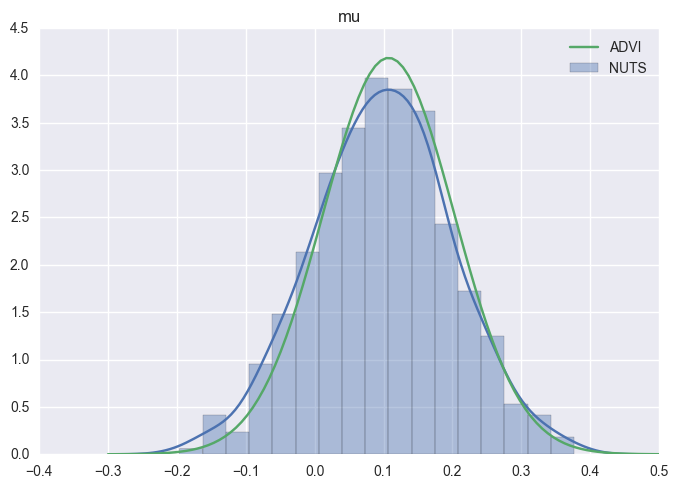

In [7]:
ax = sns.distplot(trace['mu'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['mu'], sds['mu']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('mu')
ax.legend(loc=0)

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


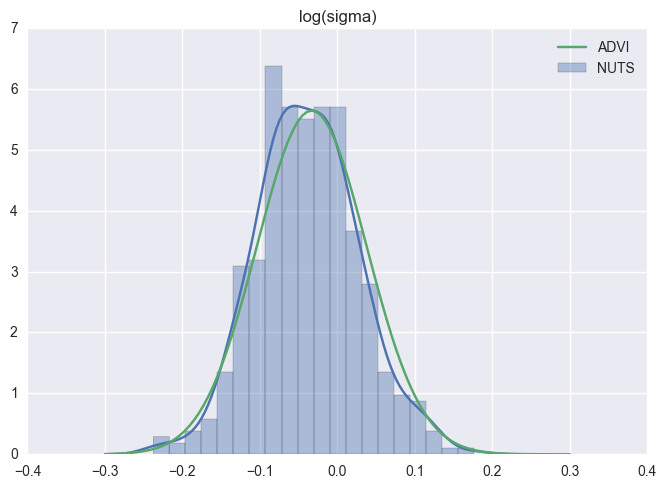

In [8]:
ax = sns.distplot(trace['sd_log_'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['sd_log_'], sds['sd_log_']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('log(sigma)')
ax.legend(loc=0)

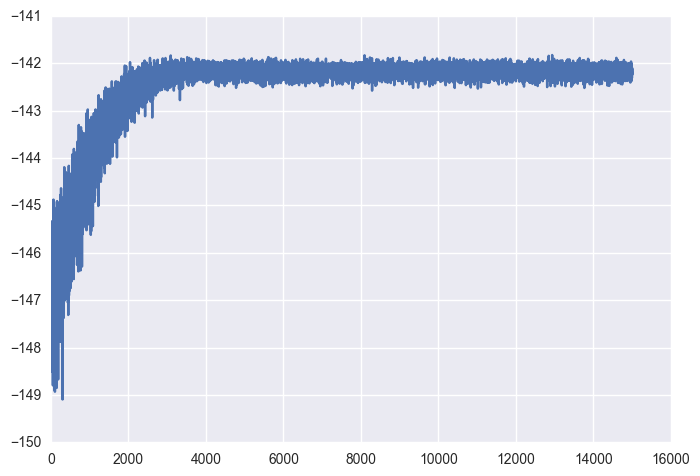

In [9]:
sns.plt.plot(elbos[5000:])